In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [126]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales=pd.read_csv("kc_house_data.csv")
sales=sales.astype(dtype_dict)
sales.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [157]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_frame = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_frame['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_frame[name]=np.power(feature,power)
#             print(power,(feature)**power)

    return poly_frame

In [158]:
sales = sales.sort_values(['sqft_living', 'price'])

In [159]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [160]:
poly1_data

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
...,...,...
8092,9640.0,4668000.0
9254,9890.0,6885000.0
3914,10040.0,7062500.0
7252,12050.0,7700000.0


# Visualizing polynomial regression

In [161]:
lr = LinearRegression()
x_1=poly1_data['power_1'].values
x_1 = x_1[:, np.newaxis]

model1=lr.fit(x_1,poly1_data["price"].values,sample_weight=None)

In [162]:
print(model1.coef_,model1.intercept_)

[280.6235679] -43580.74309447396


In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

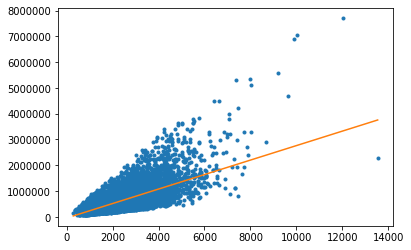

In [164]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(x_1),'-')

In [165]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price'] # add price to the data since it's the target

In [166]:
poly2_data

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0
...,...,...,...
8092,9640.0,92929600.0,4668000.0
9254,9890.0,97812100.0,6885000.0
3914,10040.0,100801600.0,7062500.0
7252,12050.0,145202500.0,7700000.0


In [167]:
x_2=poly2_data[['power_1','power_2']].values

model2=lr.fit(x_2,poly2_data["price"].values,sample_weight=None)

In [168]:
print(model2.coef_,model2.intercept_)

[6.79940947e+01 3.85812609e-02] 199222.27930548496


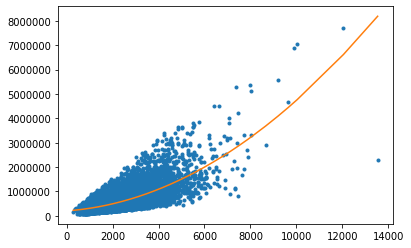

In [169]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(x_2),'-')

In [170]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price'] # add price to the data since it's the target

In [171]:
poly3_data

,power_1,power_2,power_3,price
19452,290.0,84100.0,2.438900e+07,142000.0
15381,370.0,136900.0,5.065300e+07,276000.0
860,380.0,144400.0,5.487200e+07,245000.0
18379,384.0,147456.0,5.662310e+07,265000.0
4868,390.0,152100.0,5.931900e+07,228000.0
...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,4668000.0
9254,9890.0,97812100.0,9.673617e+11,6885000.0
3914,10040.0,100801600.0,1.012048e+12,7062500.0
7252,12050.0,145202500.0,1.749690e+12,7700000.0


In [172]:
x_3=poly3_data.loc[:,:'power_3'].values

model3=lr.fit(x_3,poly3_data["price"].values,sample_weight=None)

In [173]:
print(model3.coef_,model3.intercept_)

[-9.01819864e+01  8.70465089e-02 -3.84055260e-06] 336819.7482214633


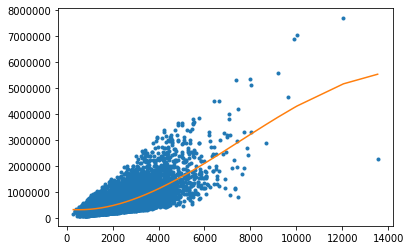

In [174]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(x_3),'-')

In [175]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price'] # add price to the data since it's the target

In [176]:
print(290**11)

1220050976570582900000000000


In [177]:
poly15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,245000.0
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59,4668000.0
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59,6885000.0
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60,7062500.0
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61,7700000.0


In [178]:
x_15=poly15_data.loc[:,:'power_15'].values

model15=lr.fit(x_15,poly15_data["price"].values,sample_weight=None)

In [179]:
x_15

array([[2.90000000e+02, 8.41000000e+04, 2.43890000e+07, ...,
        1.02606287e+32, 2.97558233e+34, 8.62918875e+36],
       [3.70000000e+02, 1.36900000e+05, 5.06530000e+07, ...,
        2.43569224e+33, 9.01206130e+35, 3.33446268e+38],
       [3.80000000e+02, 1.44400000e+05, 5.48720000e+07, ...,
        3.44498041e+33, 1.30909255e+36, 4.97455171e+38],
       ...,
       [1.00400000e+04, 1.00801600e+08, 1.01204806e+12, ...,
        1.05326649e+52, 1.05747955e+56, 1.06170947e+60],
       [1.20500000e+04, 1.45202500e+08, 1.74969012e+12, ...,
        1.12935794e+53, 1.36087632e+57, 1.63985596e+61],
       [1.35400000e+04, 1.83331600e+08, 2.48230986e+12, ...,
        5.14094120e+53, 6.96083438e+57, 9.42496976e+61]])

In [182]:
print(model15.coef_,model15.intercept_)

[ 4.56404164e-91  6.91713451e-51  2.57712948e-56  4.97841222e-60
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53] 537116.3296377079


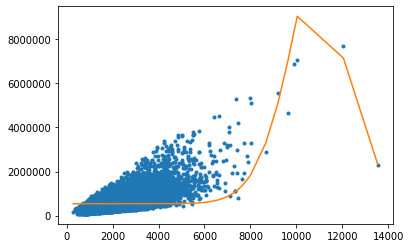

In [181]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(x_15),'-')

In [195]:
set1=pd.read_csv("wk3_kc_house_set_1_data.csv",dtype=dtype_dict)
set2=pd.read_csv("wk3_kc_house_set_2_data.csv",dtype=dtype_dict)
set3=pd.read_csv("wk3_kc_house_set_3_data.csv",dtype=dtype_dict)
set4=pd.read_csv("wk3_kc_house_set_4_data.csv",dtype=dtype_dict)

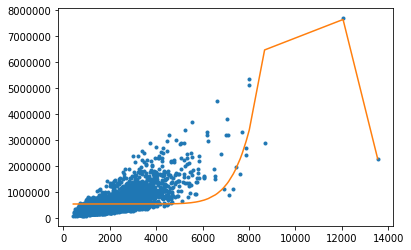

In [196]:
poly15_data1 = polynomial_sframe(set1['sqft_living'], 15)
poly15_data1['price'] = set1['price'] # add price to the data since it's the target

model15_1=lr.fit(poly15_data1.loc[:,:'power_15'].values,poly15_data1["price"].values,sample_weight=None)

plt.plot(poly15_data1['power_1'],poly15_data1['price'],'.',
         poly15_data1['power_1'], model15_1.predict(poly15_data1.loc[:,:'power_15'].values),'-')

In [197]:
print(model15_1.coef_,model15_1.intercept_)

[ 3.05794168e-90 -1.69394947e-49 -5.61767616e-55  1.21887526e-88
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52] 539058.8186680605


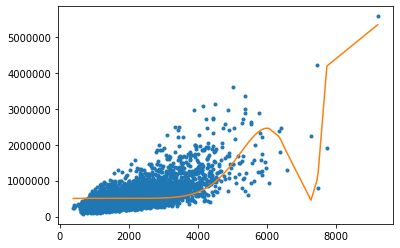

In [198]:
poly15_data2 = polynomial_sframe(set2['sqft_living'], 15)
poly15_data2['price'] = set2['price'] # add price to the data since it's the target

model15_2=lr.fit(poly15_data2.loc[:,:'power_15'].values,poly15_data2["price"].values,sample_weight=None)

plt.plot(poly15_data2['power_1'],poly15_data2['price'],'.',
         poly15_data2['power_1'], model15_2.predict(poly15_data2.loc[:,:'power_15'].values),'-')

In [199]:
print(model15_2.coef_,model15_2.intercept_)

[ 2.71335949e-77  7.33541099e-39 -1.85015239e-44  1.92231106e-49
  5.73786196e-71  1.51934987e-58  3.64549616e-55  1.50416258e-51
  5.76015665e-48  1.95770497e-44  5.39396539e-41  9.40376360e-38
 -3.63529141e-41  4.65476524e-45 -1.97199689e-49] 506893.31726394943


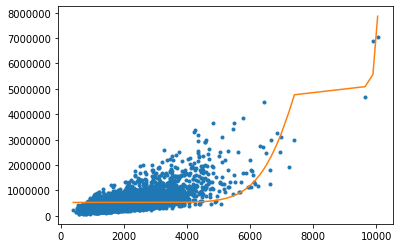

In [200]:
poly15_data3 = polynomial_sframe(set3['sqft_living'], 15)
poly15_data3['price'] = set3['price'] # add price to the data since it's the target

model15_3=lr.fit(poly15_data3.loc[:,:'power_15'].values,poly15_data3["price"].values,sample_weight=None)

plt.plot(poly15_data3['power_1'],poly15_data3['price'],'.',
         poly15_data3['power_1'], model15_3.predict(poly15_data3.loc[:,:'power_15'].values),'-')

In [201]:
print(model15_3.coef_,model15_3.intercept_)

[ 2.83751934e-88 -7.80224157e-49 -1.38764859e-55  3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51] 530874.3166533138


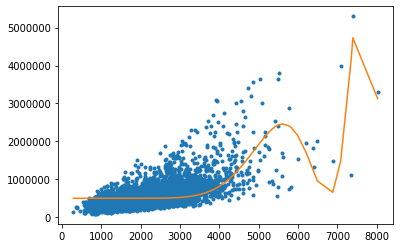

In [202]:
poly15_data4 = polynomial_sframe(set4['sqft_living'], 15)
poly15_data4['price'] = set4['price'] # add price to the data since it's the target

model15_4=lr.fit(poly15_data4.loc[:,:'power_15'].values,poly15_data4["price"].values,sample_weight=None)

plt.plot(poly15_data4['power_1'],poly15_data4['price'],'.',
         poly15_data4['power_1'], model15_4.predict(poly15_data4.loc[:,:'power_15'].values),'-')

In [203]:
print(model15_4.coef_,model15_4.intercept_)

[ 1.37116050e-76  2.79678230e-40 -2.13063833e-44 -5.68330385e-49
  2.58420327e-70  5.29002498e-58  1.27070046e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
 -9.43954119e-41  1.31573060e-44 -6.09163428e-49] 494819.1553905213


In [220]:
def get_rss(predictions,output):
    RSS=predictions-output
    RSS=RSS*RSS
    RSS=RSS.sum()
    return RSS

In [232]:
train_data=pd.read_csv("wk3_kc_house_train_data.csv",dtype=dtype_dict)
test_data=pd.read_csv("wk3_kc_house_test_data.csv",dtype=dtype_dict)
validation_data=pd.read_csv("wk3_kc_house_valid_data.csv",dtype=dtype_dict)

In [262]:
l=[]
for i in range(1,16):
    
    poly_data=polynomial_sframe(train_data['sqft_living'], i)
    poly_data['price'] = train_data['price'] 
    features=poly_data.iloc[:,:len(poly_data.columns)-1]
#     print(features.values)
    
    model=lr.fit(features.values,poly_data["price"].values,sample_weight=None)
    val_data=polynomial_sframe(validation_data['sqft_living'], i)
    val_data['price'] = validation_data['price']
    features=val_data.iloc[:,:len(val_data.columns)-1]
    predictions=model.predict(features.values)
    rss=get_rss(predictions,val_data['price'])
    l.append(rss)
    print(rss)

629097886299585.8
623955062706518.0
625820280251531.0
629987341468500.5
628240679314420.9
566268594038536.0
1073845847073242.0
7087732635315798.0
4.53034862724428e+16
2.4756881526088448e+17
1.1937655429205865e+18
5.093263521247607e+18
7.616230021278166e+17
2.2975609250032942e+18
6.955038097242461e+18


In [257]:
print(l)
print(min(l))

[629097886299585.8, 623955062706518.0, 625820280251531.0, 629987341468500.5, 628240679314420.9, 566268594038536.0, 1073845847073242.0, 7087732635315798.0, 4.53034862724428e+16, 2.4756881526088448e+17, 1.1937655429205865e+18, 5.093263521247607e+18, 7.616230021278166e+17, 2.2975609250032942e+18, 6.955038097242461e+18]
566268594038536.0


In [261]:
poly_data=polynomial_sframe(train_data['sqft_living'], 6)
poly_data['price'] = train_data['price'] 
features=poly_data.iloc[:,:len(poly_data.columns)-1]
# print(features.values)

model=lr.fit(features.values,poly_data["price"].values,sample_weight=None)
t_data=polynomial_sframe(test_data['sqft_living'], 6)
t_data['price'] = test_data['price']
features=t_data.iloc[:,:len(t_data.columns)-1]
predictions=model.predict(features.values)
rss=get_rss(predictions,t_data['price'])
print(rss)

135225114668686.84
